In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import statsmodels.api as sm
from scipy import stats

In [3]:
data = pd.read_csv('/content/drive/MyDrive/IBM data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


**we have 1470 rows and 35 columns**

In [5]:
data.shape

(1470, 35)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**nunique data we have:**

In [8]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

***chek if we have duplicated values***

In [9]:
data.duplicated().sum()

0

***chek if we have null values***

In [10]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<ipython-input-11-1ca9c64d9da3>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['Age'],shade=True,label='Age')


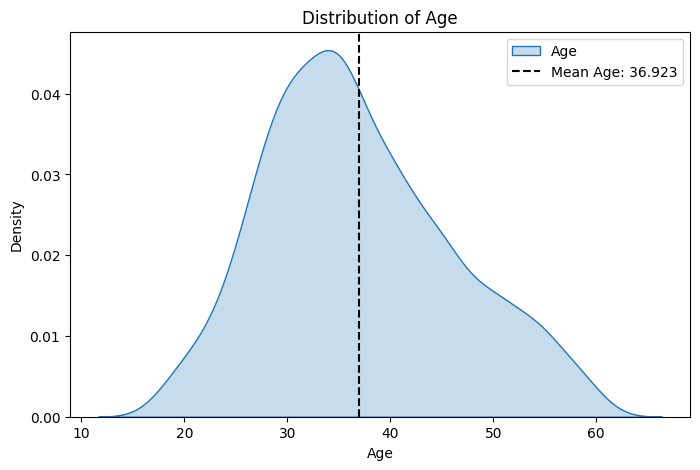

In [11]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=data['Age'],shade=True,label='Age')
plt.axvline(x=data['Age'].mean(),color='k',linestyle ="--",label='Mean Age: 36.923')
plt.legend()
plt.title('Distribution of Age')
plt.show()

In [12]:
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [13]:
fig = go.Figure(data=[go.Pie(labels=data['Attrition'], values=data['Attrition'].value_counts(), hole=.3)])
fig.update_layout(title='Distribution of Attrition')
fig.show()

In [14]:
data['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [15]:
business_travel_counts = data['BusinessTravel'].value_counts()
fig = go.Figure(data=[go.Pie(labels=business_travel_counts.index, values=business_travel_counts.values, hole=.3)])
fig.update_layout(title='Distribution of Business Travel')
fig.show()

In [16]:
data['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [17]:
department_counts = data['Department'].value_counts()
fig = go.Figure([go.Bar(x=department_counts.index, y=department_counts.values)])
fig.update_layout(title='Distribution of Departments', xaxis_title='Department', yaxis_title='Count')
fig.show()

In [32]:
plot_df = data.groupby(['Department', 'Gender'])['MonthlyIncome'].mean()

plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)

fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Department & Gender', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [18]:
data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [19]:
Education = data['EducationField'].value_counts()
fig = go.Figure([go.Scatter(x=Education.index, y=Education.values, mode='lines+markers')])
fig.update_layout(title='Distribution of Education', xaxis_title='Education', yaxis_title='Count')
fig.show()

In [20]:
data['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [21]:
fig = go.Figure(data=[go.Pie(labels=data['Gender'], values=data['Gender'].value_counts(), hole=.3)])
fig.update_layout(title='Distribution of Gender')
fig.show()

In [22]:
data['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [23]:
job = data['JobRole'].value_counts()
fig = go.Figure([go.Scatter(x=job.index, y=job.values, mode='lines+markers')])
fig.update_layout(title='Distribution of Job', xaxis_title='Job', yaxis_title='Count')
fig.show()

In [24]:
data['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [25]:
fig = go.Figure()
for department in data['Department'].unique():
    fig.add_trace(go.Violin(y=data[data['Department'] == department]['JobSatisfaction'], name=department))

fig.update_layout(title='Job Satisfaction by Department', xaxis_title='Department', yaxis_title='Job Satisfaction')
fig.show()

In [26]:
data['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [27]:
business_travel_counts = data['MaritalStatus'].value_counts()
fig = go.Figure(data=[go.Pie(labels=business_travel_counts.index, values=business_travel_counts.values, hole=.3)])
fig.update_layout(title='Marital Status')
fig.show()

In [28]:
grouped_data = data.groupby(['MaritalStatus', 'OverTime']).size().reset_index(name='count')
fig = go.Figure()

for marital_status in data['MaritalStatus'].unique():
    marital_status_data = grouped_data[grouped_data['MaritalStatus'] == marital_status]
    fig.add_trace(go.Bar(x=marital_status_data['OverTime'], y=marital_status_data['count'], name=marital_status))

fig.update_layout(title='Marital Status vs Overtime', xaxis_title='OverTime', yaxis_title='Count', barmode='group')
fig.show()

In [29]:
data['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [30]:
fig = go.Figure()
for overTime in data['OverTime'].unique():
    fig.add_trace(go.Box(y=data[data['OverTime'] == overTime]['Age'], name=overTime))
fig.update_layout(title='Distribution by OverTime', xaxis_title='OverTime', yaxis_title='Age')
fig.show()